In [16]:
import string
import unidecode
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from typing import List
from wordcloud import WordCloud
from gensim import models, corpora
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [17]:
try:
	from nltk.corpus import stopwords
except:
	import nltk
	nltk.download('stopwords')
finally:
	from nltk.corpus import stopwords

In [72]:
def remove_stopwords(text: str, sw: List[str] = stopwords.words('english')) -> str:
	'''
	additional stopwords based on initial models
	'''
	additional_sw = ['we', 'the', 'this', 'via','using', 'im', 'ive', 'ur', 'etc', 'youre', 'ur', 'like', 'eczema']
	sw = sw + additional_sw

	text_list = text.split()
	text_list = [word for word in text_list if word.lower() not in sw]
	return ' '.join(text_list)

def remove_punctuation(text: str, punct: str = string.punctuation) -> str:
	cleaned_text = ''.join([char for char in text if char not in punct])
	return cleaned_text

def unicode(text: str) -> str:
	text = str(text)
	return unidecode.unidecode(text)

def clean(text: str) -> str:
	text = unicode(text)
	text = remove_punctuation(text)
	text = remove_stopwords(text)
	return text.lower()

In [73]:
acne_df = pd.read_csv('acne.csv')
acne_df.drop(acne_df[acne_df['body'] == '[deleted]'].index, inplace = True)
acne_df.drop(acne_df[acne_df['body'] == '[removed]'].index, inplace = True)
acne_df.head()

acne_df.reset_index(drop=True)

body
0       how do you know about type of acne on your face? 
1       This blog is for acne treatment.It's explain h...
2       how do you know about type of acne on your face? 
3       Tips for Using Benzoyl Peroxide for acne treat...
4       Tips for Using Benzoyl Peroxide 1. Use a Moist...
...                                                   ...
459367  Hey! Same thing happened to me a while ago. I ...
459368  Looks like amazing progress! Try Cocokind Tume...
459369  I had something like that going on with my for...
459370  Adapelene would be stronger than bp. It’s a re...
459371  benzoyl peroxide helps to mitigate antibiotic ...

[459372 rows x 1 columns]

In [74]:
acne_df['text'] = acne_df['body'].apply(clean)
	

In [77]:
acne_comments = acne_df['text'].values
acne_comments = [[word for word in nltk.word_tokenize(comment)] for comment in acne_comments]

dictionary = corpora.Dictionary(acne_comments)

corpus = [dictionary.doc2bow(comment) for comment in acne_comments]

lda = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=20)

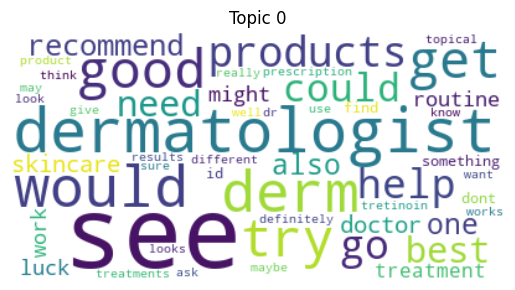

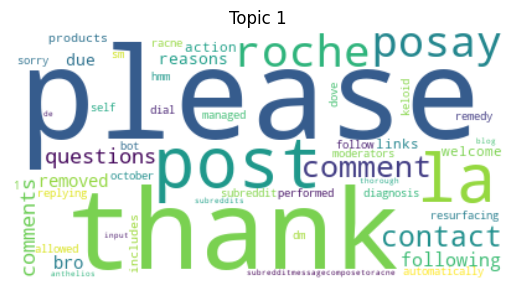

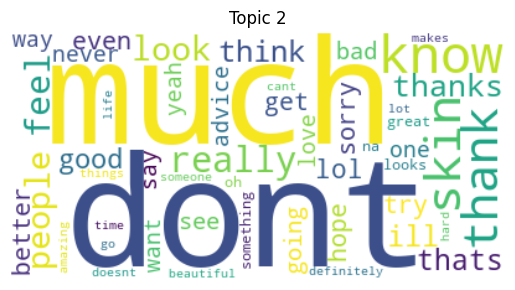

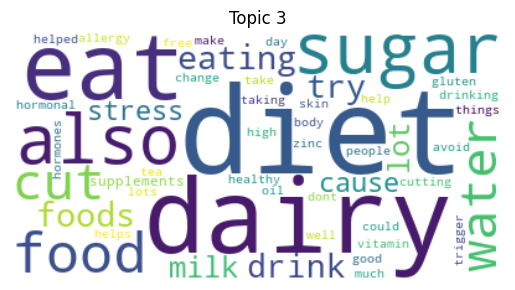

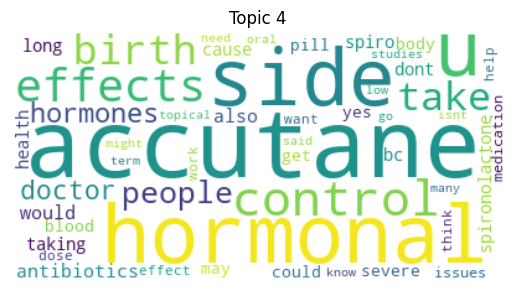

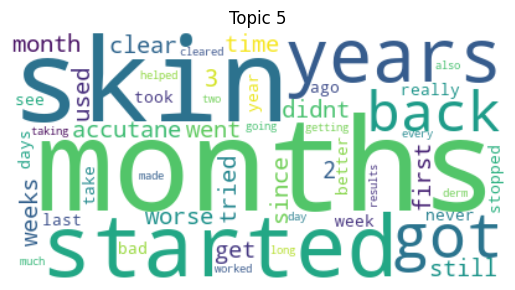

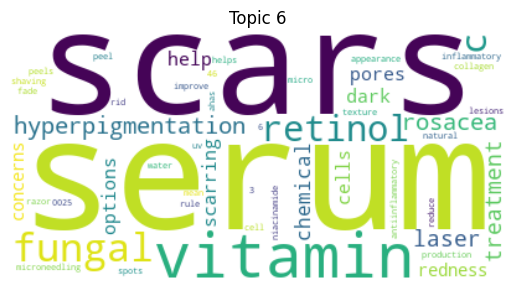

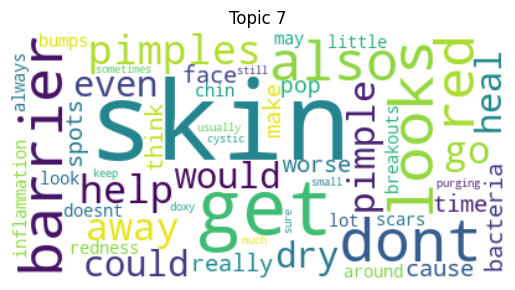

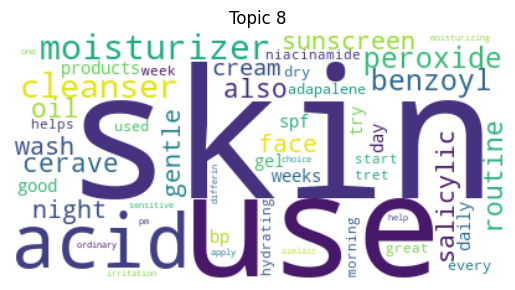

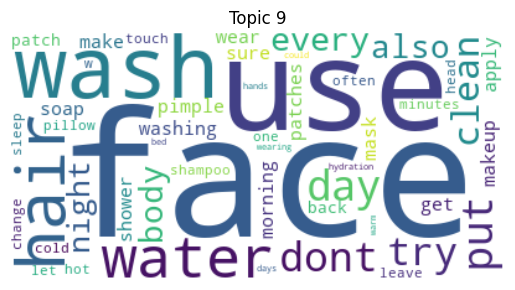

In [78]:

def create_wordcloud(model: models.LdaModel, topic: int):
	'''
	generate a word cloud given an LDA Model and the topic.
    
    Args:
        mdl: LDA Model
        topic: Integer representing the topic
    '''
    text = {word: value for word, value in model.show_topic(topic, topn=50)}
    wc = WordCloud(
        background_color="white",
        max_words=1000
    )
    wc.generate_from_frequencies(text)
    plt.clf()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic" + " "+ str(topic))
    plt.show()
    
for i in range (0,10):
    create_wordcloud(lda, topic=i)

In [80]:
eczema_df = pd.read_csv('eczema.csv')
eczema_df.drop(eczema_df[eczema_df['body'] == '[deleted]'].index, inplace = True)
eczema_df.drop(eczema_df[eczema_df['body'] == '[removed]'].index, inplace = True)
eczema_df.reset_index(drop=True)

eczema_df['text'] = eczema_df['body'].apply(clean)

eczema_comments = eczema_df['text'].values
eczema_comments = [[word for word in nltk.word_tokenize(comment)] for comment in eczema_comments]

dictionary_e = corpora.Dictionary(eczema_comments)

corpus_e = [dictionary_e.doc2bow(comment) for comment in eczema_comments]

lda_e = models.LdaModel(corpus_e, num_topics=10, id2word=dictionary_e, passes=20)


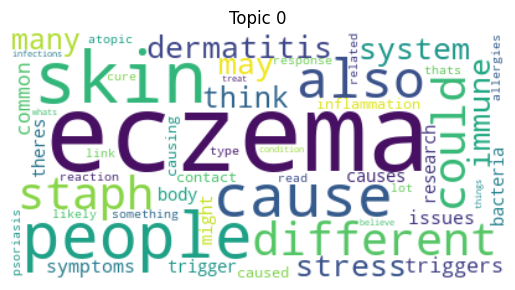

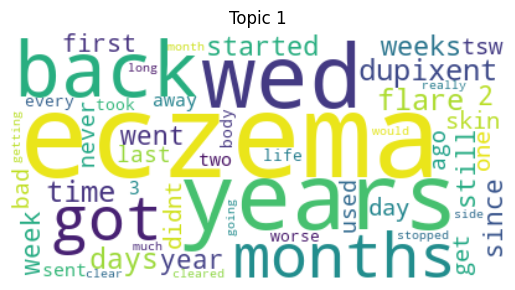

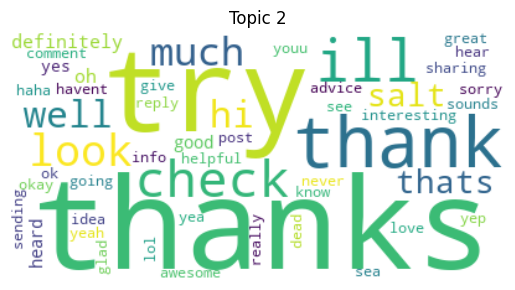

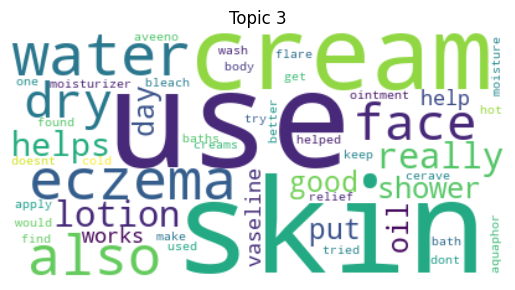

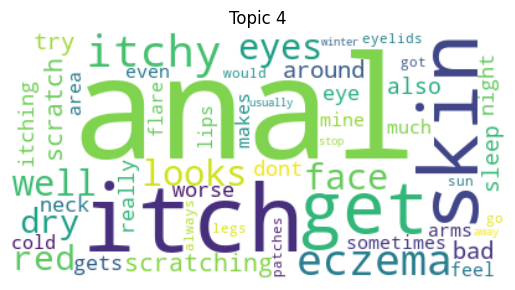

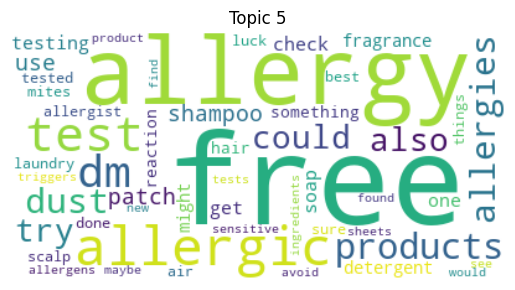

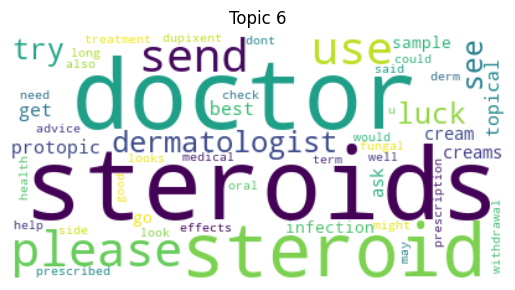

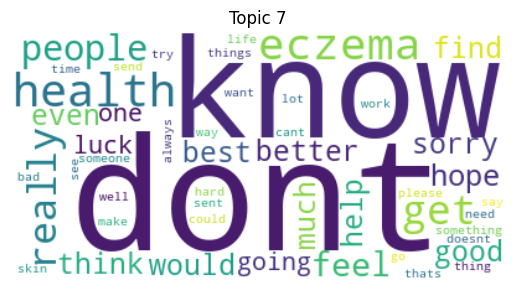

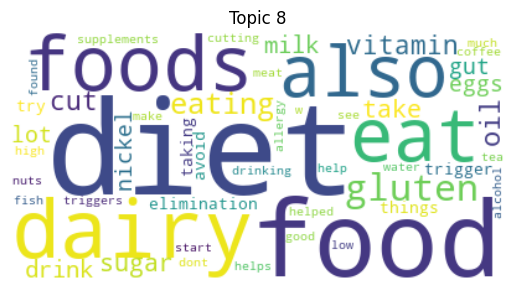

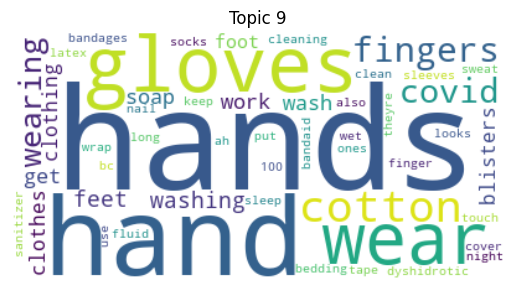

In [81]:
for i in range (0,10):
    create_wordcloud(lda_e, topic=i)

In [92]:
sebderm_df = pd.read_csv('fungalacne.csv')
sebderm_df.drop(sebderm_df[sebderm_df['body'] == '[deleted]'].index, inplace = True)
sebderm_df.drop(sebderm_df[sebderm_df['body'] == '[removed]'].index, inplace = True)
sebderm_df.reset_index(drop=True)

sebderm_df['text'] = sebderm_df['body'].apply(clean)

sebderm_comments = sebderm_df['text'].values
sebderm_comments = [[word for word in nltk.word_tokenize(comment)] for comment in sebderm_comments]

dictionary_s = corpora.Dictionary(sebderm_comments)

corpus_s = [dictionary_s.doc2bow(comment) for comment in sebderm_comments]

lda_s = models.LdaModel(corpus_s, num_topics=10, id2word=dictionary_s, passes=20)

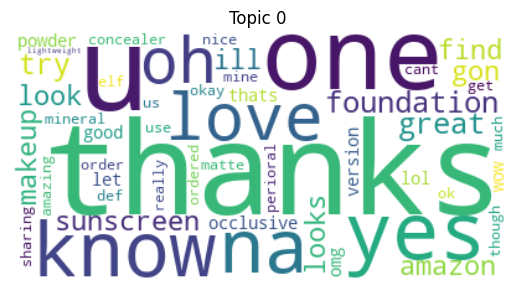

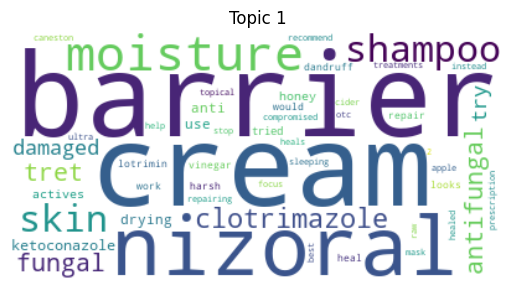

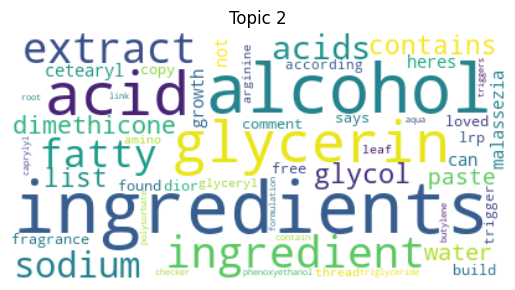

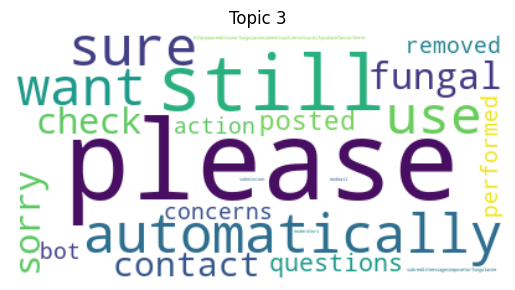

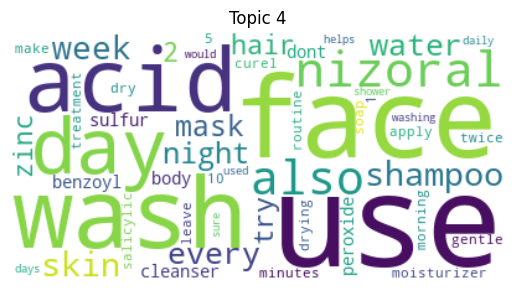

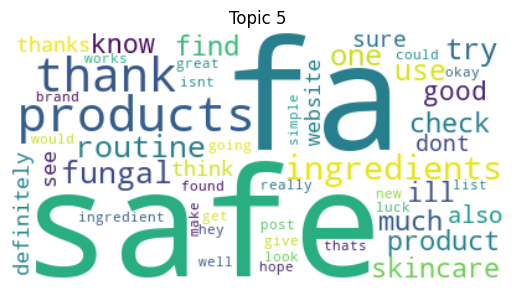

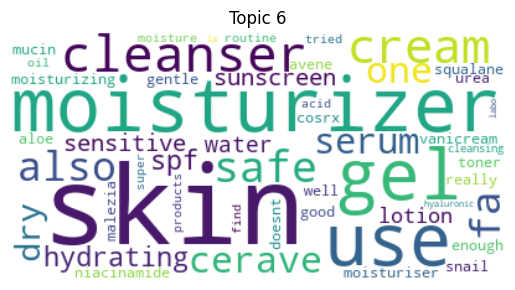

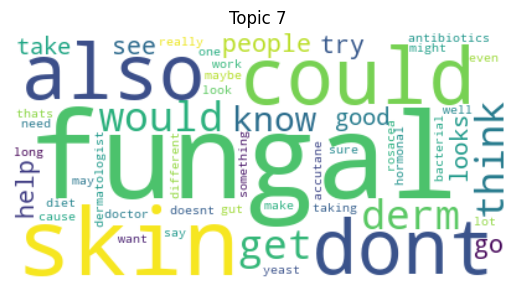

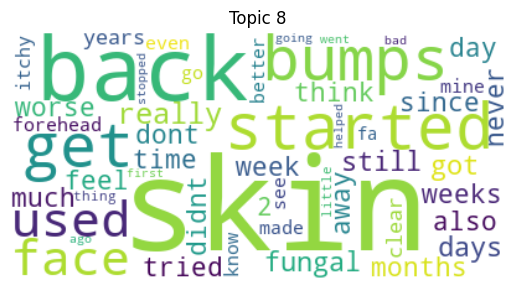

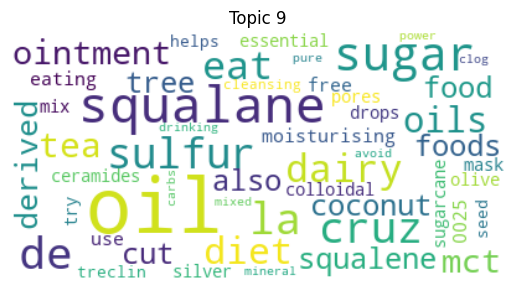

In [93]:
for i in range (0,10):
    create_wordcloud(lda_s, topic=i)

In [95]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(
	lda_s,
	corpus_s,
	dictionary_s
)



TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given